In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from math import sqrt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.model_selection import cross_val_score, cross_val_predict
import warnings
import timeit
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df = pd.read_csv('df_modelling.csv', dtype = {'TransportID': 'str'})

In [3]:
df['total_time_min'] = df['wait_time_min'] + df['completion_time_min']

In [4]:
pd.set_option('display.max_columns', None)
df.head()

,TransportID,from_floor,dest_floor,first_pending_day_of_week,first_pending_hour_of_day,completion_time_median,wait_time_min,completion_time_min,queue_size,pending,assigned,acknowledged,inprogress,Num_Active_Wrkrs_Hourly,day_sin,day_cos,hour_sin,hour_cos,pending_pctg,assigned_pctg,acknowledged_pctg,inprogress_pctg,mode_is_Bariatric Stretcher,mode_is_Bariatric Wheelchair,mode_is_Bed,mode_is_Stretcher,mode_is_Wheelchair,mode_is_Wheelchair with O2,total_time_min
0,4131343,Lunder 9,Lunder LL3,3,8,9.0,26.0,5.0,4,0,0,3,1,11.0,0.433884,-0.900969,8.660254e-01,-0.5,0.000000,0.000000,0.750000,0.250000,0,0,0,1,0,0,31.0
1,4131568,Ellison 16,Lunder LL3,4,8,11.0,38.0,9.0,13,0,0,8,5,18.0,-0.433884,-0.900969,8.660254e-01,-0.5,0.000000,0.000000,0.615385,0.384615,0,0,0,1,0,0,47.0
2,4131605,Ellison 16,Lunder LL3,3,8,11.0,25.0,6.0,4,0,0,3,1,11.0,0.433884,-0.900969,8.660254e-01,-0.5,0.000000,0.000000,0.750000,0.250000,0,0,0,1,0,0,31.0
3,4131630,Ellison 16,Lunder LL3,4,12,11.0,34.0,10.0,22,1,2,8,11,23.0,-0.433884,-0.900969,1.224647e-16,-1.0,0.045455,0.090909,0.363636,0.500000,0,0,0,1,0,0,44.0
4,4131641,Ellison 16,Lunder LL3,4,8,11.0,32.0,14.0,17,1,0,11,5,18.0,-0.433884,-0.900969,8.660254e-01,-0.5,0.058824,0.000000,0.647059,0.294118,0,0,0,1,0,0,46.0


In [5]:
df.shape

(229562, 29)

In [6]:
df.isna().sum()

TransportID                     0
from_floor                      0
dest_floor                      0
first_pending_day_of_week       0
first_pending_hour_of_day       0
completion_time_median          0
wait_time_min                   0
completion_time_min             0
queue_size                      0
pending                         0
assigned                        0
acknowledged                    0
inprogress                      0
Num_Active_Wrkrs_Hourly         0
day_sin                         0
day_cos                         0
hour_sin                        0
hour_cos                        0
pending_pctg                    0
assigned_pctg                   0
acknowledged_pctg               0
inprogress_pctg                 0
mode_is_Bariatric Stretcher     0
mode_is_Bariatric Wheelchair    0
mode_is_Bed                     0
mode_is_Stretcher               0
mode_is_Wheelchair              0
mode_is_Wheelchair with O2      0
total_time_min                  0
dtype: int64

In [7]:
df.describe()

,first_pending_day_of_week,first_pending_hour_of_day,completion_time_median,wait_time_min,completion_time_min,queue_size,pending,assigned,acknowledged,inprogress,Num_Active_Wrkrs_Hourly,day_sin,day_cos,hour_sin,hour_cos,pending_pctg,assigned_pctg,acknowledged_pctg,inprogress_pctg,mode_is_Bariatric Stretcher,mode_is_Bariatric Wheelchair,mode_is_Bed,mode_is_Stretcher,mode_is_Wheelchair,mode_is_Wheelchair with O2,total_time_min
count,229562.000000,229562.000000,229562.000000,229562.000000,229562.000000,229562.000000,229562.000000,229562.000000,229562.000000,229562.000000,229562.000000,229562.000000,229562.000000,2.295620e+05,229562.000000,229562.000000,229562.000000,229562.000000,229562.000000,229562.000000,229562.000000,229562.000000,229562.000000,229562.000000,229562.000000,229562.000000
mean,3.596353,12.199628,10.285023,25.927845,11.071397,13.884990,3.227999,0.935442,5.628662,4.092886,15.335988,0.056140,-0.139014,1.203909e-02,-0.512905,0.168312,0.069437,0.427363,0.308498,0.000937,0.000762,0.145442,0.730217,0.122307,0.000335,36.999242
std,1.828362,4.356711,2.627277,14.917264,5.712606,8.214451,4.420428,1.210351,3.440310,2.792466,6.314199,0.732145,0.664448,6.884122e-01,0.512714,0.191950,0.108252,0.225944,0.197173,0.030589,0.027600,0.352547,0.443848,0.327641,0.018311,15.245748
min,1.000000,0.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.974928,-0.900969,-1.000000e+00,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,9.000000,8.000000,15.000000,7.000000,7.000000,0.000000,0.000000,3.000000,2.000000,11.000000,-0.781831,-0.900969,-7.071068e-01,-0.866025,0.000000,0.000000,0.280000,0.181818,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.000000
50%,3.000000,12.000000,10.000000,23.000000,10.000000,14.000000,1.000000,1.000000,6.000000,4.000000,16.000000,0.433884,-0.222521,1.224647e-16,-0.707107,0.100000,0.040000,0.419355,0.294118,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,34.000000
75%,5.000000,15.000000,12.000000,33.000000,14.000000,20.000000,5.000000,1.000000,8.000000,6.000000,20.000000,0.781831,0.623490,7.071068e-01,-0.258819,0.312500,0.100000,0.571429,0.411765,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,45.000000
max,7.000000,23.000000,19.000000,90.000000,34.000000,49.000000,32.000000,13.000000,21.000000,19.000000,37.000000,0.974928,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,121.000000


### Exploratory Data Analysis

In [8]:
# vars = ['TransportModeDSC','first_pending_day_of_week','first_pending_hour_of_day']
# fig,axs = plt.subplots(nrows=3,ncols=1,figsize=(10,15))
# plt.subplots_adjust(hspace=.4)

# for i,var in enumerate(vars):
#     ax= axs[i]
#     df.boxplot('wait_time_min',by=var,ax=ax,vert=False)
#     ax.set_ylabel(var)
#     ax.set_xlabel('Wait Time (min)')
#     ax.yaxis.tick_right()
#     ax.set_yticklabels(ax.get_yticklabels(), fontsize=10)
#     ax.set_title(f'Box Plot of Wait Time by {var}',fontsize=15)
# fig.suptitle('')

In [9]:
# fig,axs = plt.subplots(nrows=3,ncols=1,figsize=(10,15))
# plt.subplots_adjust(hspace=.4)

# for i,var in enumerate(vars):
#     ax= axs[i]
#     df.boxplot('completion_time_min',by=var,ax=ax,vert=False)
#     ax.set_ylabel(var)
#     ax.set_xlabel('Completion Time (min)')
#     ax.yaxis.tick_right()
#     ax.set_yticklabels(ax.get_yticklabels(), fontsize=10)
#     ax.set_title(f'Box Plot of Completion Time by {var}',fontsize=15)
# fig.suptitle('')

In [10]:
df.describe()

,first_pending_day_of_week,first_pending_hour_of_day,completion_time_median,wait_time_min,completion_time_min,queue_size,pending,assigned,acknowledged,inprogress,Num_Active_Wrkrs_Hourly,day_sin,day_cos,hour_sin,hour_cos,pending_pctg,assigned_pctg,acknowledged_pctg,inprogress_pctg,mode_is_Bariatric Stretcher,mode_is_Bariatric Wheelchair,mode_is_Bed,mode_is_Stretcher,mode_is_Wheelchair,mode_is_Wheelchair with O2,total_time_min
count,229562.000000,229562.000000,229562.000000,229562.000000,229562.000000,229562.000000,229562.000000,229562.000000,229562.000000,229562.000000,229562.000000,229562.000000,229562.000000,2.295620e+05,229562.000000,229562.000000,229562.000000,229562.000000,229562.000000,229562.000000,229562.000000,229562.000000,229562.000000,229562.000000,229562.000000,229562.000000
mean,3.596353,12.199628,10.285023,25.927845,11.071397,13.884990,3.227999,0.935442,5.628662,4.092886,15.335988,0.056140,-0.139014,1.203909e-02,-0.512905,0.168312,0.069437,0.427363,0.308498,0.000937,0.000762,0.145442,0.730217,0.122307,0.000335,36.999242
std,1.828362,4.356711,2.627277,14.917264,5.712606,8.214451,4.420428,1.210351,3.440310,2.792466,6.314199,0.732145,0.664448,6.884122e-01,0.512714,0.191950,0.108252,0.225944,0.197173,0.030589,0.027600,0.352547,0.443848,0.327641,0.018311,15.245748
min,1.000000,0.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.974928,-0.900969,-1.000000e+00,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,9.000000,8.000000,15.000000,7.000000,7.000000,0.000000,0.000000,3.000000,2.000000,11.000000,-0.781831,-0.900969,-7.071068e-01,-0.866025,0.000000,0.000000,0.280000,0.181818,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.000000
50%,3.000000,12.000000,10.000000,23.000000,10.000000,14.000000,1.000000,1.000000,6.000000,4.000000,16.000000,0.433884,-0.222521,1.224647e-16,-0.707107,0.100000,0.040000,0.419355,0.294118,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,34.000000
75%,5.000000,15.000000,12.000000,33.000000,14.000000,20.000000,5.000000,1.000000,8.000000,6.000000,20.000000,0.781831,0.623490,7.071068e-01,-0.258819,0.312500,0.100000,0.571429,0.411765,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,45.000000
max,7.000000,23.000000,19.000000,90.000000,34.000000,49.000000,32.000000,13.000000,21.000000,19.000000,37.000000,0.974928,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,121.000000


In [11]:
def corr_plot(dataframe):
    plt.figure(figsize=(16, 6))
    mask = np.triu(np.ones_like(dataframe.corr(), dtype=np.bool))
    heatmap = sns.heatmap(dataframe.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
    heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=16)

/var/folders/y4/m6pvx7sn327_q5sxknfvsb100000gn/T/ipykernel_32291/1178921485.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(dataframe.corr(), dtype=np.bool))


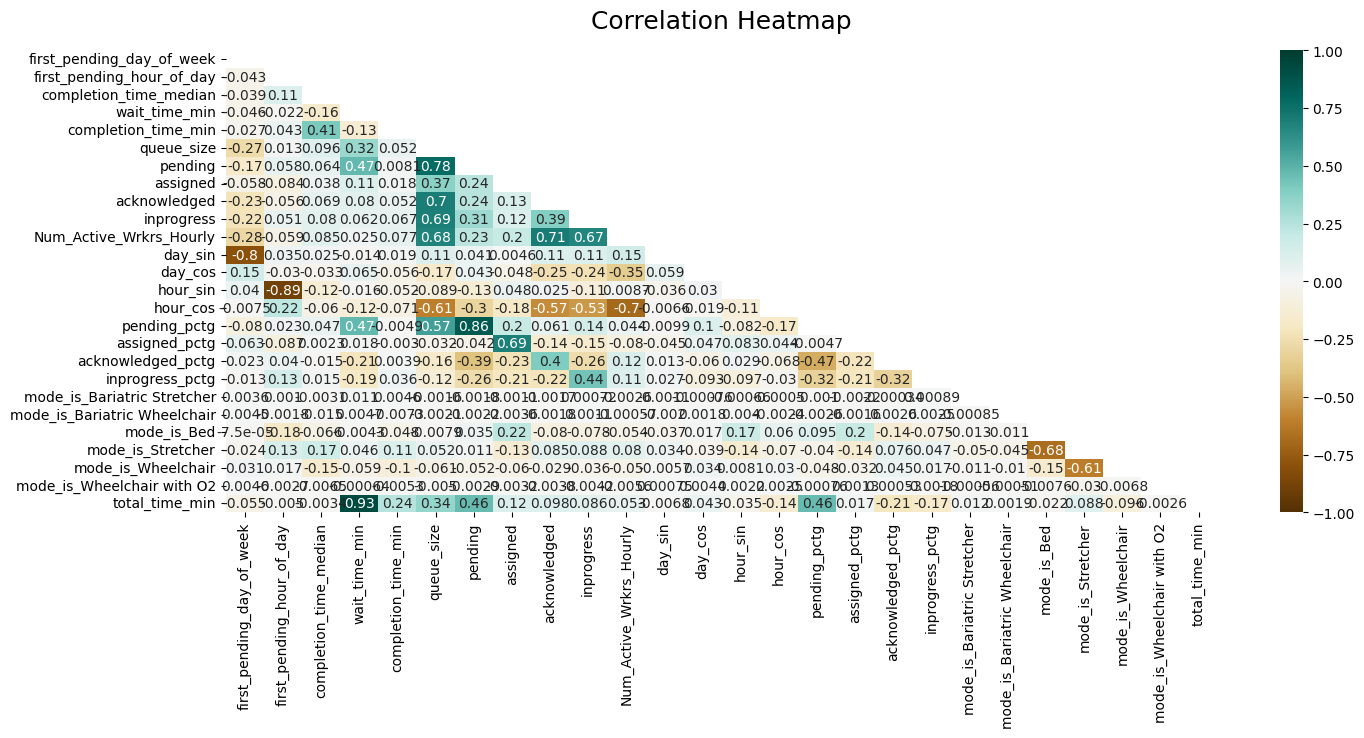

In [12]:
corr_plot(df)
#queue status are highly correlated with queue size 

### Train Test Split

In [13]:
#drop one category in one hot encoding to avoid correlated features (wheelchair with O2)
#drop one category of queue size status to avoid the same issue (inprogress)
def train_test_processing(dataframe):
    X = dataframe.drop(columns = ['TransportID', 'from_floor', 'dest_floor','first_pending_day_of_week','first_pending_hour_of_day', 'wait_time_min', 'completion_time_min','pending','acknowledged','assigned','inprogress','inprogress_pctg', 'mode_is_Wheelchair with O2', 'total_time_min'])
    y1 = dataframe.wait_time_min
    y2 = dataframe.completion_time_min
    y3 = dataframe.total_time_min
    print('Predictors are:', X.columns)
    X_train, X_test, y1_train, y1_test= train_test_split(X, y1, test_size=0.25, random_state=2022)
    X_train, X_test, y2_train, y2_test= train_test_split(X, y2, test_size=0.25, random_state=2022)
    X_train, X_test, y3_train, y3_test= train_test_split(X, y3, test_size=0.25, random_state=2022)
    print('size of training set is', X_train.shape)
    print('size of test set is', X_test.shape)
    #apply scaler on X 
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    #check multicollinearity 
    vif_data = pd.DataFrame()
    vif_data["feature"] = X_train.columns
    vif_data["VIF"] = [variance_inflation_factor(X_train_scaled, i)
                          for i in range(len(X_train.columns))]
    print(vif_data)
    return X, X_train, X_train_scaled, X_test_scaled, X_test, y1_train, y1_test, y2_train, y2_test, y3_train, y3_test
    

In [14]:
X, X_train, X_train_scaled, X_test_scaled, X_test, y1_train, y1_test, y2_train, y2_test, y3_train, y3_test = train_test_processing(df)

Predictors are: Index(['completion_time_median', 'queue_size', 'Num_Active_Wrkrs_Hourly',
       'day_sin', 'day_cos', 'hour_sin', 'hour_cos', 'pending_pctg',
       'assigned_pctg', 'acknowledged_pctg', 'mode_is_Bariatric Stretcher',
       'mode_is_Bariatric Wheelchair', 'mode_is_Bed', 'mode_is_Stretcher',
       'mode_is_Wheelchair'],
      dtype='object')
size of training set is (172171, 15)
size of test set is (57391, 15)
                         feature        VIF
0         completion_time_median   7.054065
1                     queue_size  16.095005
2        Num_Active_Wrkrs_Hourly  28.197294
3                        day_sin   3.271278
4                        day_cos   3.286531
5                       hour_sin   3.503494
6                       hour_cos   5.110503
7                   pending_pctg   4.474176
8                  assigned_pctg   1.573720
9              acknowledged_pctg   6.429527
10   mode_is_Bariatric Stretcher   1.048185
11  mode_is_Bariatric Wheelchair   1.0385

High VIFs for several variables. Will test regularization terms 

### Naive Mean Baseline

In [15]:
#naive baseline of mean - for all test data, use mean in training set as prediction 
def naive_mean(y_train, y_test):
    prediction = y_train.mean()
    y_pred = [prediction for i in range(len(y_test))]
    MSE = mean_squared_error(y_test, y_pred)
    RMSE = sqrt(mean_squared_error(y_test, y_pred))
    MAE = mean_absolute_error(y_test, y_pred)
    R2 = r2_score(y_test, y_pred)
    MAPE = mean_absolute_error(y_test, y_pred)
    print('Naive Mean Baseline:')
    print("MSE for testing set is", MSE)
    print("RMSE for testing set is", RMSE)
    print("MAE for testing set is", MAE)
    print("R^2 for testing set is", R2)
    print("MAPE for testing set is", MAPE)

In [16]:
print('Mean of Wait Time in the Training Set is', np.mean(y1_train))
print('Mean of Completion Time in the Training Set is', np.mean(y2_train))
print('Mean of Total Time in the Training Set is', np.mean(y3_train))

Mean of Wait Time in the Training Set is 25.974374313908847
Mean of Completion Time in the Training Set is 11.070418363138971
Mean of Total Time in the Training Set is 37.044792677047816


In [17]:
print('Prediction of Wait Time:')
naive_mean(y1_train, y1_test)

Prediction of Wait Time:
Naive Mean Baseline:
MSE for testing set is 221.62542699387308
RMSE for testing set is 14.8870892720462
MAE for testing set is 11.480299504705426
R^2 for testing set is -0.0001563184574746579
MAPE for testing set is 11.480299504705426


In [18]:
print('Prediction of Completion Time:')
naive_mean(y2_train, y2_test)

Prediction of Completion Time:
Naive Mean Baseline:
MSE for testing set is 32.60252962850901
RMSE for testing set is 5.709862487705725
MAE for testing set is 4.510709257380589
R^2 for testing set is -4.6984768231617124e-07
MAPE for testing set is 4.510709257380589


In [19]:
print('Prediction of Total Time:')
naive_mean(y3_train, y3_test)

Prediction of Total Time:
Naive Mean Baseline:
MSE for testing set is 230.24494465128305
RMSE for testing set is 15.173824325175346
MAE for testing set is 11.724811651672885
R^2 for testing set is -0.0001442028828744224
MAPE for testing set is 11.724811651672885


### Linear Regression

In [20]:
start = timeit.default_timer()

In [21]:
#linear regression
def linear_regression(X_train, y_train, X_test, y_test):
    lr_columns = X.columns.insert(0,'const')
    X_train = sm.add_constant(X_train)
    X_test = sm.add_constant(X_test)
    model = sm.OLS(y_train, X_train).fit()
    summary = model.summary(xname = lr_columns.tolist())
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    MSE_train = mean_squared_error(y_train, y_pred_train)
    RMSE_train = sqrt(mean_squared_error(y_train, y_pred_train))
    MAE_train = mean_absolute_error(y_train, y_pred_train)
    R2_train = r2_score(y_train, y_pred_train)
    MAPE_train = mean_absolute_percentage_error(y_train, y_pred_train)
    MSE_test = mean_squared_error(y_test, y_pred_test)
    RMSE_test = sqrt(mean_squared_error(y_test, y_pred_test))
    MAE_test = mean_absolute_error(y_test, y_pred_test)
    R2_test = r2_score(y_test, y_pred_test)
    MAPE_test = mean_absolute_percentage_error(y_test, y_pred_test)
    print('Linear Regression Model:')
    print(summary)
    print("MSE for training set is", MSE_train)
    print("RMSE for training set is", RMSE_train)
    print("MAE for training set is", MAE_train)
    print("R^2 for training set is", R2_train)
    print("MAPE for training set is", MAPE_train)
    print("MSE for testing set is", MSE_test)
    print("RMSE for testing set is", RMSE_test)
    print("MAE for testing set is", MAE_test)
    print("R^2 for testing set is", R2_test)
    print("MAPE for testing set is", MAPE_test)
    return model 

In [22]:
print('Prediction of Wait Time:')
linear_regression(X_train_scaled, y1_train, X_test_scaled, y1_test)
#MAPE is large because for some values wait time = 0

Prediction of Wait Time:
Linear Regression Model:
                            OLS Regression Results                            
Dep. Variable:          wait_time_min   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     4523.
Date:                Sun, 13 Nov 2022   Prob (F-statistic):               0.00
Time:                        20:35:47   Log-Likelihood:            -6.8111e+05
No. Observations:              172171   AIC:                         1.362e+06
Df Residuals:                  172155   BIC:                         1.362e+06
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

In [23]:
print('Prediction of Completion Time:')
linear_regression(X_train_scaled, y2_train, X_test_scaled, y2_test)

Prediction of Completion Time:
Linear Regression Model:
                             OLS Regression Results                            
Dep. Variable:     completion_time_min   R-squared:                       0.178
Model:                             OLS   Adj. R-squared:                  0.178
Method:                  Least Squares   F-statistic:                     2482.
Date:                 Sun, 13 Nov 2022   Prob (F-statistic):               0.00
Time:                         20:35:47   Log-Likelihood:            -5.2751e+05
No. Observations:               172171   AIC:                         1.055e+06
Df Residuals:                   172155   BIC:                         1.055e+06
Df Model:                           15                                         
Covariance Type:             nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------

In [24]:
print('Prediction of Total Time:')
linear_regression(X_train_scaled, y3_train, X_test_scaled, y3_test)

Prediction of Total Time:
Linear Regression Model:
                            OLS Regression Results                            
Dep. Variable:         total_time_min   R-squared:                       0.242
Model:                            OLS   Adj. R-squared:                  0.242
Method:                 Least Squares   F-statistic:                     3663.
Date:                Sun, 13 Nov 2022   Prob (F-statistic):               0.00
Time:                        20:35:47   Log-Likelihood:            -6.8977e+05
No. Observations:              172171   AIC:                         1.380e+06
Df Residuals:                  172155   BIC:                         1.380e+06
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

In [25]:
def regularized_model(Model, X_train, X_test, y_train, y_test):
# in sklearn lambda = alpha; the higher the alpha, the more features are shrinked to 0
# Model will be either LassoCV, RidgeCV or ElasticNetCV
# use 10 fold cross validation to select the best lambda
    lambdas = 10**np.linspace(10,-2,100)*0.5
    model = Model(alphas = lambdas, cv = 10).fit(X_train, y_train)
    feature_names = X.columns
    model_coefficients = model.coef_
    coefficients_df = pd.DataFrame(data = model_coefficients, 
                              index = feature_names, 
                              columns = ['Coefficient value'])
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    MSE_train = mean_squared_error(y_train, y_pred_train)
    RMSE_train = sqrt(mean_squared_error(y_train, y_pred_train))
    MAE_train = mean_absolute_error(y_train, y_pred_train)
    R2_train = r2_score(y_train, y_pred_train)
    MAPE_train = mean_absolute_percentage_error(y_train, y_pred_train)
    MSE_test = mean_squared_error(y_test, y_pred_test)
    RMSE_test = sqrt(mean_squared_error(y_test, y_pred_test))
    MAE_test = mean_absolute_error(y_test, y_pred_test)
    R2_test = r2_score(y_test, y_pred_test)
    MAPE_test = mean_absolute_percentage_error(y_test, y_pred_test)
    print('The best alpha is', model.alpha_)
    print("MSE for training set is", MSE_train)
    print("RMSE for training set is", RMSE_train)
    print("MAE for training set is", MAE_train)
    print("R^2 for training set is", R2_train)
    print("MAPE for training set is", MAPE_train)
    print("MSE for testing set is", MSE_test)
    print("RMSE for testing set is", RMSE_test)
    print("MAE for testing set is", MAE_test)
    print("R^2 for testing set is", R2_test)
    print("MAPE for testing set is", MAPE_test)
    return coefficients_df

### Lasso Regression

In [26]:
#list of lambda values -- from very large to very small 
10**np.linspace(10,-2,100)*0.5

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

In [27]:
print('Prediction of Waiting Time:')
print('Lasso Model:')
regularized_model(LassoCV,  X_train_scaled, X_test_scaled, y1_train, y1_test)

Prediction of Waiting Time:
Lasso Model:
The best alpha is 0.005
MSE for training set is 159.88359677069394
RMSE for training set is 12.644508561849841
MAE for training set is 9.439243405578043
R^2 for training set is 0.2824737402157307
MAPE for training set is 19549722925880.56
MSE for testing set is 159.44106634379642
RMSE for testing set is 12.626997518958987
MAE for testing set is 9.438534962793723
R^2 for testing set is 0.2804706928787829
MAPE for testing set is 35161600208121.633


,Coefficient value
completion_time_median,-17.038427
queue_size,18.316024
Num_Active_Wrkrs_Hourly,-11.013745
day_sin,-0.398598
day_cos,0.547122
hour_sin,0.779609
hour_cos,-0.969228
pending_pctg,28.908242
assigned_pctg,3.546711
acknowledged_pctg,0.253589


In [28]:
print('Prediction of Completion Time:')
print('Lasso Model:')
regularized_model(LassoCV,  X_train_scaled, X_test_scaled, y2_train, y2_test)

Prediction of Completion Time:
Lasso Model:
The best alpha is 0.005
MSE for training set is 26.85236053212233
RMSE for training set is 5.181926334108034
MAE for training set is 3.9598215898113773
R^2 for training set is 0.1774214302239061
MAPE for training set is 0.6280752088564843
MSE for testing set is 26.739109074728354
RMSE for testing set is 5.170987243721295
MAE for testing set is 3.9602469018536888
R^2 for testing set is 0.17984518555103235
MAPE for testing set is 0.6204822938051527


,Coefficient value
completion_time_median,12.938686
queue_size,-0.588903
Num_Active_Wrkrs_Hourly,-0.000000
day_sin,0.127116
day_cos,-0.659940
hour_sin,-0.098506
hour_cos,-1.252072
pending_pctg,-0.487992
assigned_pctg,0.000000
acknowledged_pctg,-0.127163


In [29]:
print('Prediction of Total Time:')
print('Lasso Model:')
regularized_model(LassoCV,  X_train_scaled, X_test_scaled, y3_train, y3_test)

Prediction of Total Time:
Lasso Model:
The best alpha is 0.005
MSE for training set is 176.7975597612983
RMSE for training set is 13.296524348915332
MAE for training set is 10.004926943755407
R^2 for training set is 0.24174437638491608
MAPE for training set is 0.31375902350272283
MSE for testing set is 175.45381062418835
RMSE for testing set is 13.245897879124252
MAE for testing set is 9.989871290300394
R^2 for testing set is 0.23785900343973598
MAPE for testing set is 0.3154976245759481


,Coefficient value
completion_time_median,-3.944150
queue_size,17.482406
Num_Active_Wrkrs_Hourly,-11.440247
day_sin,-0.197010
day_cos,-0.166137
hour_sin,0.601526
hour_cos,-2.632274
pending_pctg,28.249526
assigned_pctg,3.628388
acknowledged_pctg,0.000000


### Ridge Regression

In [30]:
start = timeit.default_timer()

In [31]:
print('Prediction of Waiting Time:')
print('Ridge Model:')
regularized_model(RidgeCV, X_train_scaled, X_test_scaled, y1_train, y1_test)

Prediction of Waiting Time:
Ridge Model:
The best alpha is 7.087370814634009
MSE for training set is 159.8379019918458
RMSE for training set is 12.642701530600403
MAE for training set is 9.436251938785531
R^2 for training set is 0.28267880943121493
MAPE for training set is 19543879947827.37
MSE for testing set is 159.43882594177197
RMSE for testing set is 12.62690880389068
MAE for testing set is 9.43608609808046
R^2 for testing set is 0.2804808034165087
MAPE for testing set is 35175592908640.56


,Coefficient value
completion_time_median,-17.194241
queue_size,18.937127
Num_Active_Wrkrs_Hourly,-11.872127
day_sin,-0.398506
day_cos,0.495143
hour_sin,0.820316
hour_cos,-1.189002
pending_pctg,28.850556
assigned_pctg,4.063033
acknowledged_pctg,0.499814


In [32]:
print('Prediction of Completion Time:')
print('Ridge Model:')
regularized_model(RidgeCV, X_train_scaled, X_test_scaled, y2_train, y2_test)

Prediction of Completion Time:
Ridge Model:
The best alpha is 21.643806405415308
MSE for training set is 26.840194438296646
RMSE for training set is 5.180752304279432
MAE for training set is 3.9578687910745467
R^2 for training set is 0.17779411880176577
MAPE for training set is 0.6275348274119595
MSE for testing set is 26.731156314869526
RMSE for testing set is 5.170218207664888
MAE for testing set is 3.958998906564886
R^2 for testing set is 0.1800891164265207
MAPE for testing set is 0.6200683694345271


,Coefficient value
completion_time_median,13.036707
queue_size,-0.851455
Num_Active_Wrkrs_Hourly,-0.568473
day_sin,0.218556
day_cos,-0.824604
hour_sin,-0.182985
hour_cos,-1.744074
pending_pctg,-0.671862
assigned_pctg,0.064963
acknowledged_pctg,-0.317424


In [33]:
print('Prediction of Total Time:')
print('Ridge Model:')
regularized_model(RidgeCV, X_train_scaled, X_test_scaled, y3_train, y3_test)

Prediction of Total Time:
Ridge Model:
The best alpha is 9.369087114301934
MSE for training set is 176.75139117317977
RMSE for training set is 13.29478812065765
MAE for training set is 10.003095511448038
R^2 for training set is 0.24194238585757233
MAPE for training set is 0.3136687772421176
MSE for testing set is 175.45397613016166
RMSE for testing set is 13.245904126565376
MAE for testing set is 9.988471142712624
R^2 for testing set is 0.23785828451042357
MAPE for testing set is 0.31541251832210815


,Coefficient value
completion_time_median,-4.117699
queue_size,18.058550
Num_Active_Wrkrs_Hourly,-12.424649
day_sin,-0.180085
day_cos,-0.328919
hour_sin,0.637473
hour_cos,-2.938097
pending_pctg,28.172210
assigned_pctg,4.119472
acknowledged_pctg,0.174009


In [34]:
stop = timeit.default_timer()
execution_time = stop - start

print("Ridge Regression Executed in "+str(execution_time)+'seconds')

Ridge Regression Executed in 52.45849129097769seconds


### Elastic Net Model

In [35]:
start = timeit.default_timer()

In [36]:
print('Prediction of Waiting Time:')
print('Elastic Net Model:')
regularized_model(ElasticNetCV, X_train_scaled, X_test_scaled, y1_train, y1_test)

Prediction of Waiting Time:
Elastic Net Model:
The best alpha is 0.005
MSE for training set is 160.25227544425647
RMSE for training set is 12.659078775497704
MAE for training set is 9.475641295896194
R^2 for training set is 0.2808191825559918
MAPE for training set is 19698998962448.176
MSE for testing set is 159.76671854855405
RMSE for testing set is 12.639886018020656
MAE for testing set is 9.472304396610149
R^2 for testing set is 0.2790010821277703
MAPE for testing set is 35271790947541.53


,Coefficient value
completion_time_median,-15.718225
queue_size,15.982365
Num_Active_Wrkrs_Hourly,-8.243026
day_sin,-0.525833
day_cos,0.914505
hour_sin,0.693753
hour_cos,-0.806281
pending_pctg,27.561080
assigned_pctg,2.802532
acknowledged_pctg,-0.628427


In [37]:
print('Prediction of Completion Time:')
print('Elastic Net Model:')
regularized_model(ElasticNetCV, X_train_scaled, X_test_scaled, y2_train, y2_test)

Prediction of Completion Time:
Elastic Net Model:
The best alpha is 0.005
MSE for training set is 26.884387367175044
RMSE for training set is 5.185015657370289
MAE for training set is 3.971377900001984
R^2 for training set is 0.1764403400087423
MAPE for training set is 0.6314871468963248
MSE for testing set is 26.776635517291545
RMSE for testing set is 5.174614528377118
MAE for testing set is 3.9725127864677923
R^2 for testing set is 0.17869415645536102
MAPE for testing set is 0.6239655567146104


,Coefficient value
completion_time_median,11.991996
queue_size,-0.586204
Num_Active_Wrkrs_Hourly,-0.022450
day_sin,0.152238
day_cos,-0.682429
hour_sin,-0.170910
hour_cos,-1.304802
pending_pctg,-0.536728
assigned_pctg,0.000000
acknowledged_pctg,-0.199177


In [38]:
print('Prediction of Total Time:')
print('Elastic Net Model:')
regularized_model(ElasticNetCV, X_train_scaled, X_test_scaled, y3_train, y3_test)

Prediction of Total Time:
Elastic Net Model:
The best alpha is 0.005
MSE for training set is 177.11287273735397
RMSE for training set is 13.308376036818089
MAE for training set is 10.027129543522245
R^2 for training set is 0.24039205094775606
MAPE for training set is 0.3147134435308212
MSE for testing set is 175.66009656011838
RMSE for testing set is 13.253682377366616
MAE for testing set is 10.009906514016526
R^2 for testing set is 0.23696293302538163
MAPE for testing set is 0.31646189334938835


,Coefficient value
completion_time_median,-3.655611
queue_size,15.298082
Num_Active_Wrkrs_Hourly,-8.556360
day_sin,-0.329381
day_cos,0.152663
hour_sin,0.484434
hour_cos,-2.337944
pending_pctg,26.934577
assigned_pctg,2.900420
acknowledged_pctg,-0.906269


Since coefficients for transport mode of bariatric stretcher, bariatric wheelchair, and wheelchair with O2 are often shrinked to 0, let's group these variables into stretcher and wheelchair to see if that can improve performance. -- update 2022.10.25 -- grouping does not help 

In [39]:
stop = timeit.default_timer()
execution_time = stop - start

print("Elastic Net Executed in "+str(execution_time)+' seconds') 

Elastic Net Executed in 2.0621196669817436 seconds


### Add age as predictor 

In [40]:
df_age = pd.read_csv('df_modelling (w age buckets).csv', dtype = {'TransportID': 'str'})

In [41]:
#add total time 
df_age['total_time_min'] = df_age['wait_time_min'] + df_age['completion_time_min']

### Train Test Split

In [42]:
X, X_train, X_train_scaled, X_test_scaled, X_test, y1_train, y1_test, y2_train, y2_test, y3_train, y3_test = train_test_processing(df_age)

Predictors are: Index(['completion_time_median', 'queue_size', 'Num_Active_Wrkrs_Hourly',
       'day_sin', 'day_cos', 'hour_sin', 'hour_cos', 'pending_pctg',
       'assigned_pctg', 'acknowledged_pctg', 'mode_is_Bariatric Stretcher',
       'mode_is_Bariatric Wheelchair', 'mode_is_Bed', 'mode_is_Stretcher',
       'mode_is_Wheelchair', 'age_bucket'],
      dtype='object')
size of training set is (172171, 16)
size of test set is (57391, 16)
                         feature        VIF
0         completion_time_median   7.054553
1                     queue_size  16.095292
2        Num_Active_Wrkrs_Hourly  28.198056
3                        day_sin   3.271487
4                        day_cos   3.286538
5                       hour_sin   3.504143
6                       hour_cos   5.110580
7                   pending_pctg   4.474464
8                  assigned_pctg   1.573773
9              acknowledged_pctg   6.429532
10   mode_is_Bariatric Stretcher   1.056201
11  mode_is_Bariatric Wheel

### Linear Regression

In [43]:
start = timeit.default_timer()

In [44]:
print('Prediction of Wait Time:')
lr_wait_time = linear_regression(X_train_scaled, y1_train, X_test_scaled, y1_test)
print('----------------------------------------')
#MAPE is large because for some values wait time = 0
print('Prediction of Completion Time:')
lr_completion_time = linear_regression(X_train_scaled, y2_train, X_test_scaled, y2_test)
print('----------------------------------------')
print('Prediction of Total Time:')
lr_total_time = linear_regression(X_train_scaled, y3_train, X_test_scaled, y3_test)

Prediction of Wait Time:
Linear Regression Model:
                            OLS Regression Results                            
Dep. Variable:          wait_time_min   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     4242.
Date:                Sun, 13 Nov 2022   Prob (F-statistic):               0.00
Time:                        20:36:47   Log-Likelihood:            -6.8110e+05
No. Observations:              172171   AIC:                         1.362e+06
Df Residuals:                  172154   BIC:                         1.362e+06
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

In [45]:
stop = timeit.default_timer()
execution_time = stop - start

print("Linear Regression Executed in "+str(execution_time)+' seconds')

Linear Regression Executed in 0.42793737500323914 seconds


eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


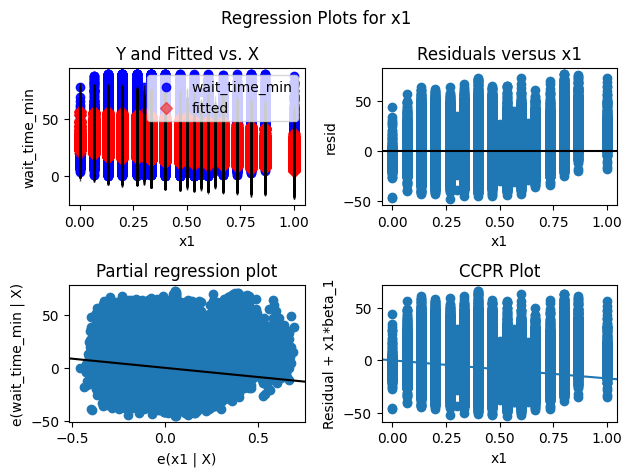

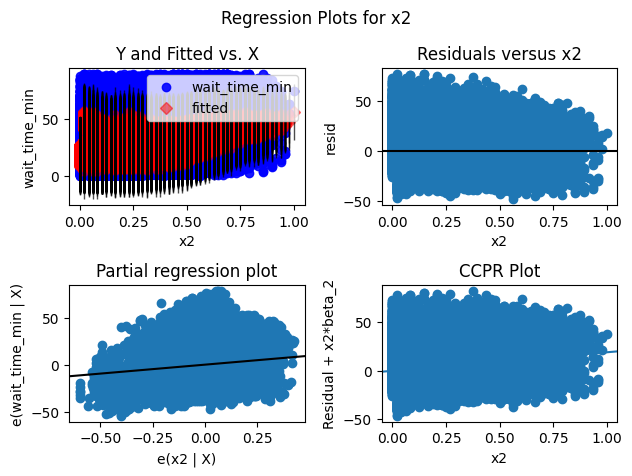

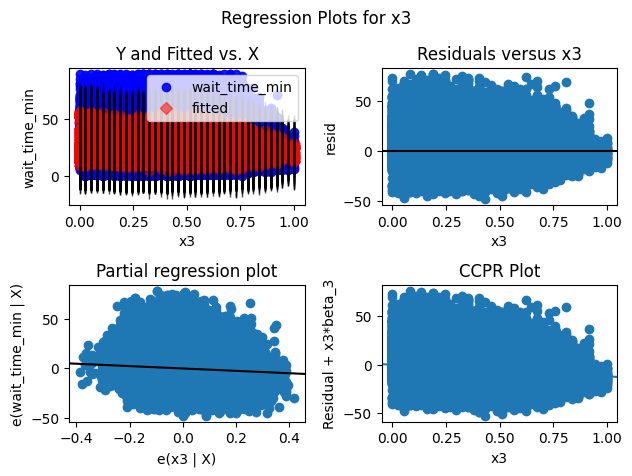

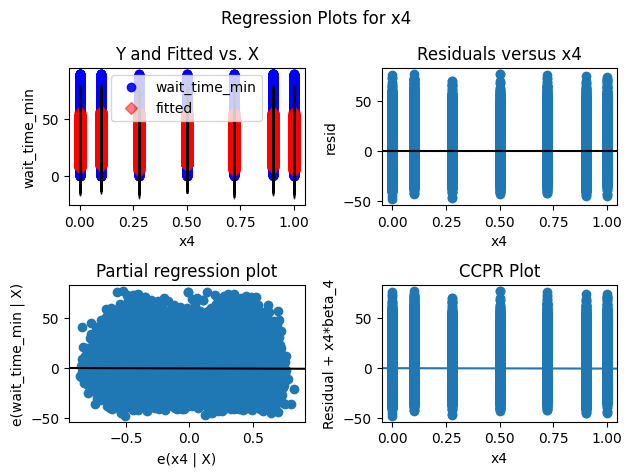

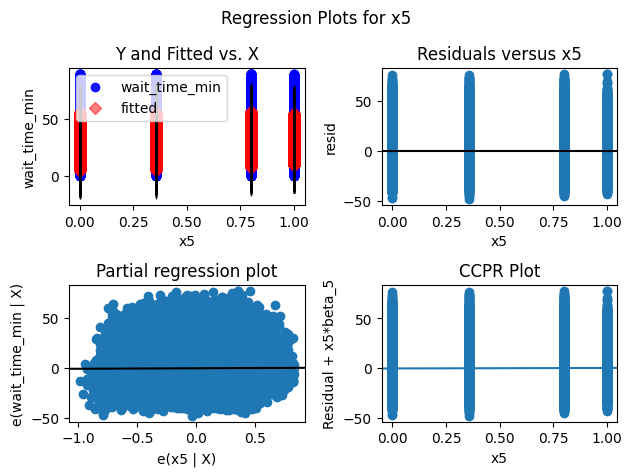

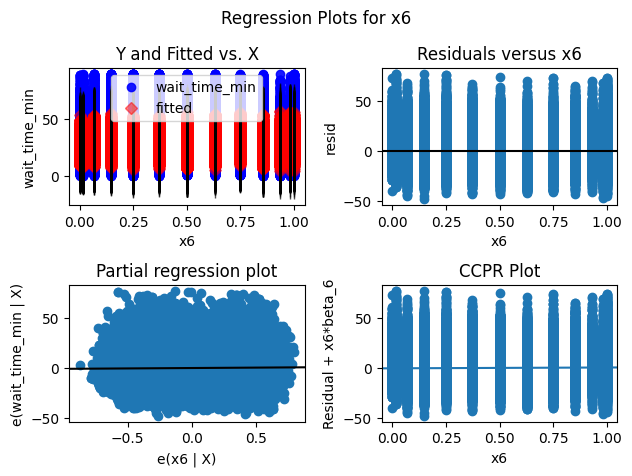

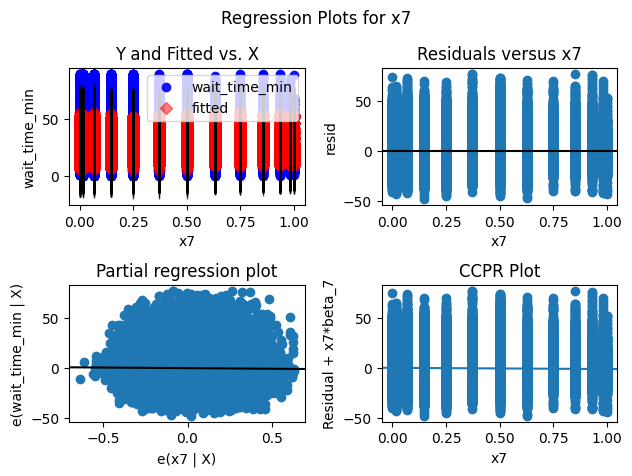

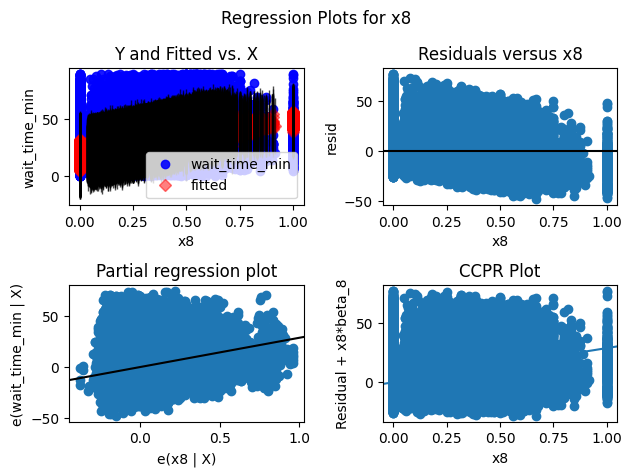

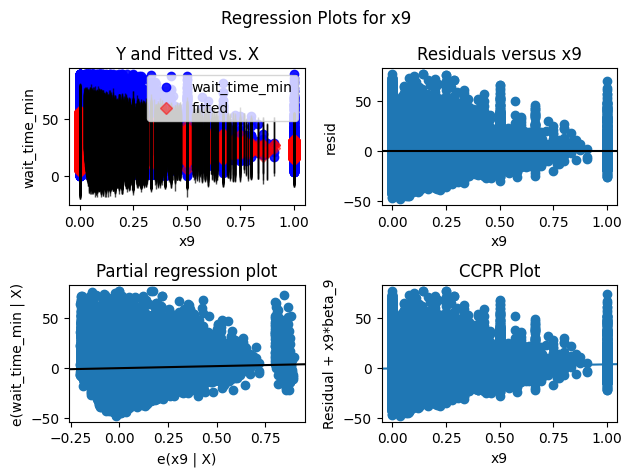

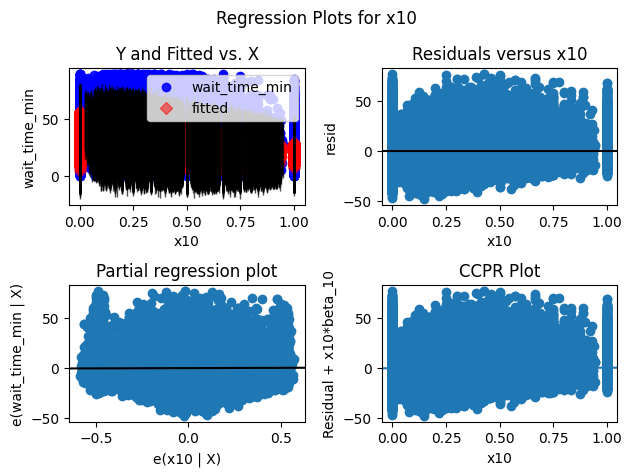

In [46]:
#'completion_time_median', 'queue_size', 'Num_Active_Wrkrs_Hourly','day_sin', 'day_cos', 'hour_sin', 'hour_cos', 'pending_pctg',
#'assigned_pctg', 'acknowledged_pctg', 'mode_is_Bariatric Stretcher',
#'mode_is_Bariatric Wheelchair', 'mode_is_Bed', 'mode_is_Stretcher',
#'mode_is_Wheelchair', 'age_bucket'
columns = ['x1','x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10']
for col in columns:
    fig = sm.graphics.plot_regress_exog(lr_wait_time, col)
    fig.tight_layout(pad=1.0)

### Lasso Regression 

In [47]:
start = timeit.default_timer()

In [48]:
print('Prediction of Waiting Time:')
print('Lasso Model:')
regularized_model(LassoCV,  X_train_scaled, X_test_scaled, y1_train, y1_test)
print('----------------------------------------')
print('Prediction of Completion Time:')
print('Lasso Model:')
regularized_model(LassoCV,  X_train_scaled, X_test_scaled, y2_train, y2_test)
print('----------------------------------------')
print('Prediction of Total Time:')
print('Lasso Model:')
regularized_model(LassoCV,  X_train_scaled, X_test_scaled, y3_train, y3_test)

Prediction of Waiting Time:
Lasso Model:
The best alpha is 0.005
MSE for training set is 159.8645691327239
RMSE for training set is 12.64375613228616
MAE for training set is 9.439113793967715
R^2 for training set is 0.28255913252726816
MAPE for training set is 19559064782084.312
MSE for testing set is 159.416722912399
RMSE for testing set is 12.626033538384055
MAE for testing set is 9.43767881753347
R^2 for testing set is 0.2805805504752479
MAPE for testing set is 35112972826360.375
----------------------------------------
Prediction of Completion Time:
Lasso Model:
The best alpha is 0.005
MSE for training set is 26.839304761369203
RMSE for training set is 5.180666439886783
MAE for training set is 3.9588428163064333
R^2 for training set is 0.17782137261335018
MAPE for training set is 0.6279396759554438
MSE for testing set is 26.73386494508627
RMSE for testing set is 5.170480146474433
MAE for testing set is 3.9599001350861736
R^2 for testing set is 0.18000603601772258
MAPE for testing s

,Coefficient value
completion_time_median,-3.929237
queue_size,17.494632
Num_Active_Wrkrs_Hourly,-11.436883
day_sin,-0.202213
day_cos,-0.163029
hour_sin,0.594665
hour_cos,-2.627390
pending_pctg,28.236227
assigned_pctg,3.617094
acknowledged_pctg,0.000000


In [49]:
stop = timeit.default_timer()
execution_time = stop - start

print("Lasso Regression Executed in "+str(execution_time)+' seconds')

Lasso Regression Executed in 3.34685441700276 seconds


### Ridge Regression 

In [50]:
start = timeit.default_timer()

In [51]:
print('Prediction of Waiting Time:')
print('Ridge Model:')
regularized_model(RidgeCV, X_train_scaled, X_test_scaled, y1_train, y1_test)
print('----------------------------------------')
print('Prediction of Completion Time:')
print('Ridge Model:')
regularized_model(RidgeCV, X_train_scaled, X_test_scaled, y2_train, y2_test)
print('----------------------------------------')
print('Prediction of Total Time:')
print('Ridge Model:')
regularized_model(RidgeCV, X_train_scaled, X_test_scaled, y3_train, y3_test)

Prediction of Waiting Time:
Ridge Model:
The best alpha is 7.087370814634009
MSE for training set is 159.81736758155228
RMSE for training set is 12.641889399197902
MAE for training set is 9.436266755810248
R^2 for training set is 0.28277096384175093
MAPE for training set is 19556507838296.46
MSE for testing set is 159.41150187913868
RMSE for testing set is 12.625826780022711
MAE for testing set is 9.43511139475985
R^2 for testing set is 0.28060411207409064
MAPE for testing set is 35109866216567.434
----------------------------------------
Prediction of Completion Time:
Ridge Model:
The best alpha is 21.643806405415308
MSE for training set is 26.82579518738614
RMSE for training set is 5.179362430587972
MAE for training set is 3.956893844486737
R^2 for training set is 0.17823521652967833
MAPE for training set is 0.6273827708056818
MSE for testing set is 26.727889229996755
RMSE for testing set is 5.169902245690604
MAE for testing set is 3.958833703857612
R^2 for testing set is 0.180189326

,Coefficient value
completion_time_median,-4.100357
queue_size,18.072364
Num_Active_Wrkrs_Hourly,-12.421289
day_sin,-0.186050
day_cos,-0.325449
hour_sin,0.629495
hour_cos,-2.931992
pending_pctg,28.160744
assigned_pctg,4.109231
acknowledged_pctg,0.180612


In [52]:
stop = timeit.default_timer()
execution_time = stop - start

print("Ridge Regression Executed in "+str(execution_time)+' seconds')

Ridge Regression Executed in 43.750684792001266 seconds


### Elastic Net 

In [53]:
start = timeit.default_timer()

In [54]:
print('Prediction of Waiting Time:')
print('Elastic Net Model:')
regularized_model(ElasticNetCV, X_train_scaled, X_test_scaled, y1_train, y1_test)
print('----------------------------------------')
print('Prediction of Completion Time:')
print('Elastic Net Model:')
regularized_model(ElasticNetCV, X_train_scaled, X_test_scaled, y2_train, y2_test)
print('----------------------------------------')
print('Prediction of Total Time:')
print('Elastic Net Model:')
regularized_model(ElasticNetCV,  X_train_scaled, X_test_scaled, y3_train, y3_test)

Prediction of Waiting Time:
Elastic Net Model:
The best alpha is 0.005
MSE for training set is 160.23312300462658
RMSE for training set is 12.658322282381128
MAE for training set is 9.475626317824483
R^2 for training set is 0.280905134952929
MAPE for training set is 19708987309621.91
MSE for testing set is 159.74128304135814
RMSE for testing set is 12.638879817505908
MAE for testing set is 9.471362643350233
R^2 for testing set is 0.27911586806898747
MAPE for testing set is 35219855517891.555
----------------------------------------
Prediction of Completion Time:
Elastic Net Model:
The best alpha is 0.005
MSE for training set is 26.87107964758957
RMSE for training set is 5.183732212179712
MAE for training set is 3.9703738496042478
R^2 for training set is 0.17684800044256166
MAPE for training set is 0.6313501207030083
MSE for testing set is 26.77168830060598
RMSE for testing set is 5.174136478737875
MAE for testing set is 3.9721774823196254
R^2 for testing set is 0.1788458998650404
MAPE 

,Coefficient value
completion_time_median,-3.642549
queue_size,15.306060
Num_Active_Wrkrs_Hourly,-8.553124
day_sin,-0.334048
day_cos,0.155090
hour_sin,0.477690
hour_cos,-2.334054
pending_pctg,26.927172
assigned_pctg,2.893508
acknowledged_pctg,-0.900622


In [55]:
stop = timeit.default_timer()
execution_time = stop - start

print("Elastic Net Executed in "+str(execution_time)+' seconds')

Elastic Net Executed in 1.930962874990655 seconds
